# Logistic Regression from scratch

#### Implementing Logistic Regression from scratch using just loops 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
X = np.array([
    [22, 2.5],
    [25, 3.0],
    [28, 3.5],
    [30, 4.0],
    [32, 5.0],
    [35, 6.0],
    [40, 7.0],
    [45, 8.5]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])


#### Making Sigmoid Function 

In [36]:
def Sigmoid(z):

    g = 1 / (1 + np.exp(-z))

    return g

#### Checking Sigmoid Function with input value 0

In [37]:
print('sigmod of value 0: ', Sigmoid(0))        ### Should print 0.5 if correct 

sigmod of value 0:  0.5


#### Plot for Data Visualization (Shows linear structure)

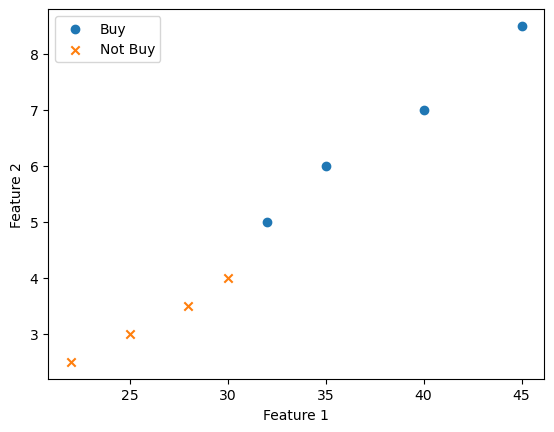

In [38]:
y = y.ravel()

pos = y == 1
neg = y == 0

plt.scatter(X[pos, 0], X[pos, 1], marker='o', label='Buy')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', label='Not Buy')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Computing Loss Function

In [39]:
def loss(X,y,w,b):
    m, n = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(w, X[i]) + b    ### Function 
        q = Sigmoid(z)

        loss = (-y[i] * np.log(q)) - (1 - y[i]) * (np.log(1 - q))   ## Loss function for Logistic Regression with Sigmoid

        cost = cost + loss

    
    total_cost = cost / m           ## Performing Summation 



    return total_cost

#### Testing Loss function with Keeping W and B parameters as Zeros

In [40]:
m, n = X.shape
Try_W = np.zeros(n)
Try_b = 0

cost = loss(X,y,Try_W, Try_b)
print('{:.3f}'.format(cost))

0.693


### Gradient for Logistic Regression


In [41]:
def Gradient(X, y, w, b):           ### Basically we are calculating the change in loss with respect to all the parameters that are W and b , this gives us magnitude and direction of that change of loss -----> With this we can later tell how the parameters must be updated to minimize the loss (Gradient Descent)
    m, n = X.shape
    d_dw = np.zeros(w.shape)
    d_db = 0

    for i in range(m):
        z_wb = np.dot(w, X[i]) + b
        g_wb = Sigmoid(z_wb)

        d_db = d_db + g_wb - y[i]

        for j in range(n):
            d_dw[j] = d_dw[j] + (g_wb - y[i]) * X[i][j]    ## Keeping this is a second loop as W is a vector and is dependent of X(Feature) so it needs to cover all the fetures present that is 'n' which is 2 in this case 

    d_db /= m           ## Taking the average as we did the same during the calculation of Loss to so it keeps the gradient stable if we do this here too
    d_dw /= m

    return d_dw, d_db

### Testing For Zero values of W and B 

In [42]:
Try_w = np.zeros(n)
Try_b = 0

d_dw, d_db = Gradient(X,y, Try_w, Try_b)
print(d_db)
print(d_dw)

0.0
[-2.9375  -0.84375]


## Performing Gradient Descent

In [43]:
def Gradient_descent(X,y, w, b, alpha, num_iters):   ### Used to update the W and B parameters again and again until the loss minimizes

    J_history = []   #### To store the values of loss for each change in W and B with intervals

    for i in range(num_iters):
        d_dw , d_db = Gradient(X,y,w,b)
        
        w = w - alpha * d_dw
        b = b - alpha * d_db

        cost = loss(X,y,w,b)
        J_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
        
         
    return w, b, J_history



#### Testing Gradient Descent for early parameters and confirming for loss minimizationm

In [44]:
w_init = np.zeros(n)
b_init = 0

alpha = 0.1
num_iters = 300

w_fin, b_fin, J_history = Gradient_descent(X, y, w_init, b_init, alpha, num_iters)

Iteration 0: Cost 3.9928
Iteration 100: Cost 2.0152
Iteration 200: Cost 0.8275


/tmp/ipykernel_23287/3116581532.py:9: RuntimeWarning: divide by zero encountered in log
  loss = (-y[i] * np.log(q)) - (1 - y[i]) * (np.log(1 - q))   ## Loss function for Logistic Regression with Sigmoid
/tmp/ipykernel_23287/3116581532.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  loss = (-y[i] * np.log(q)) - (1 - y[i]) * (np.log(1 - q))   ## Loss function for Logistic Regression with Sigmoid


In [45]:
print("Initial loss:", J_history[0])  ## Checking the First and last value of loss calculated to determine if model has learned something or not
print("Final loss:", J_history[-1])


Initial loss: 3.9928469842938674
Final loss: 0.0174943764839023


#### Plot to show loss over iterations

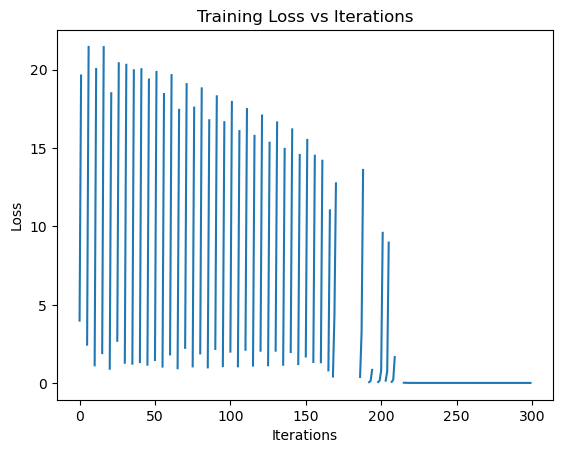

In [46]:
plt.plot(J_history)                 ### As the data was small this result is expected
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()


### Computing Prediction

##### Can also be done using dot product (vectorization) but here i have implemented using normal operations

In [47]:
def predict(X, w, b):           ### Converting Probabilities into classes using thresholding
    m, n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += w[j] * X[i][j]

        z_wb += b           ### This is added later because it w1X1 + w2X2 ..... + b (b is scalar hence its getting added in the very end)
        f_wb = Sigmoid(z_wb)

        p[i] = 1 if f_wb > 0.5 else 0

    return p

#### Checking Prediction

In [48]:
y_pred = predict(X, w_fin, b_fin)
accuracy = np.mean(y_pred == y)
print(accuracy)


1.0


In [49]:
print("Predictions:", y_pred)
print("Actual:     ", y)


Predictions: [0. 0. 0. 0. 1. 1. 1. 1.]
Actual:      [0 0 0 0 1 1 1 1]
